# Portfolio Optimization & Performance Evaluation

Welcome! In this project, we’ll be diving into the world of portfolio optimization and performance evaluation using real-world financial data. The goal is simple: construct an optimal portfolio, evaluate its performance, and draw insights using a range of techniques—everything from calculating monthly returns to building the efficient frontier and assessing portfolio risk.

Here’s what you can expect:
1. **Data Handling**: We’ll start by gathering stock data and calculating monthly returns.
2. **Optimization**: Next, we’ll use portfolio optimization techniques like mean-variance optimization.
3. **Performance Metrics**: Along the way, we’ll analyze the portfolio’s performance using risk-adjusted metrics like Sharpe ratio, Jensen’s alpha, and more.
4. **Visualization**: To bring everything together, we’ll visualize key insights using tools like correlation plots and efficient frontiers.

In this analysis, I’ll be using a globally diversified selection of stocks across major sectors and regions. Let’s get started!


# Getting Our Tools Ready

Before we dive into the analysis, let’s get all our tools in place.

In [1]:
import yfinance as yf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

## Part A: Data Collection & Monthly Returns Calculation

We begin by collecting historical stock price data for a carefully selected, portfolio with a focus on US markets. The data covers a 4-year period from **January 2020 to January 2024**. Using the `yfinance` library, we’ll gather daily stock prices and convert them into monthly returns for further analysis.

### Stocks in the Portfolio:

| Stock Name               | Ticker | Region        | Sector/Industry          |
|--------------------------|--------|---------------|--------------------------|
| Wolfspeed Inc.           | WOLF   | United States | Semiconductors           |
| SoFi Technologies Inc.   | SOFI   | United States | Financial Services       |
| NVIDIA Corporation       | NVDA   | United States | Semiconductors           |
| Johnson & Johnson        | JNJ    | United States | Pharmaceuticals          |
| Meta Platforms Inc.      | META   | United States | Technology/Internet      |
| Novo Nordisk.            | NVO    | Denmark       | Healthcare               |
| Mastercard Inc.          | MA     | United States | Financial Services       |
| Walmart Inc.             | WMT    | United States | Retail                   |


This globally diversified selection covers key regions and sectors, providing a broad base for portfolio optimization. Now, let's move on to calculating monthly returns using this data.


In [19]:
tickers = ['WOLF', 'NVO', 'NVDA', 'JNJ', 'META', 'HSBC', 'MA', 'WMT']

try:

    data = yf.download(tickers, start="2020-01-01", end="2024-01-01", interval='1d')['Adj Close']
    data.to_csv('raw_data.csv')
except Exception as e:
    print("Download failed, loading data from local 'raw_data.csv' file instead.")
    data = pd.read_csv('raw_data.csv', index_col='Date', parse_dates=True)

monthly_prices = data.resample('ME').ffill()
monthly_returns = monthly_prices.pct_change() * 100
monthly_returns = monthly_returns.round(2).fillna(0)

monthly_returns.index = monthly_returns.index.strftime('%Y-%m')

monthly_returns_styled = monthly_returns.style.format({
    ticker: '{:.2f}%' for ticker in tickers
})

display(monthly_returns_styled)


[*********************100%***********************]  8 of 8 completed


Ticker,HSBC,JNJ,MA,META,NVDA,NVO,WMT,WOLF
Date,,,,,,,,
2020-01,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2020-02,-4.69%,-9.09%,-8.13%,-4.68%,14.30%,-4.44%,-5.95%,-3.79%
2020-03,-16.56%,-2.49%,-16.78%,-13.34%,-2.40%,3.56%,5.98%,-20.72%
2020-04,-8.14%,14.42%,14.01%,22.73%,10.88%,5.20%,6.98%,21.63%
2020-05,-10.42%,-0.17%,9.43%,9.96%,21.47%,4.12%,2.51%,22.17%
2020-06,1.21%,-5.46%,-1.72%,0.88%,7.06%,-0.70%,-3.45%,12.34%
2020-07,-2.91%,3.65%,4.48%,11.71%,11.76%,-0.23%,8.03%,16.44%
2020-08,-4.50%,5.95%,16.10%,15.58%,26.00%,1.88%,7.74%,-8.44%
2020-09,-9.48%,-2.95%,-5.59%,-10.68%,1.20%,5.13%,0.76%,1.01%


## Part B: Correlation Plot of Monthly Returns

Next, we’ll dive into the relationships between the stocks in our portfolio by calculating and visualizing the correlation matrix. A correlation plot will help us understand how the returns of individual stocks move in relation to one another.

This is crucial for portfolio optimization because diversification relies on the idea of combining assets that don’t move in perfect sync. The lower the correlation between the stocks, the more potential for risk reduction through diversification.

We’ll plot the correlation matrix and discuss how these correlations might influence portfolio construction.


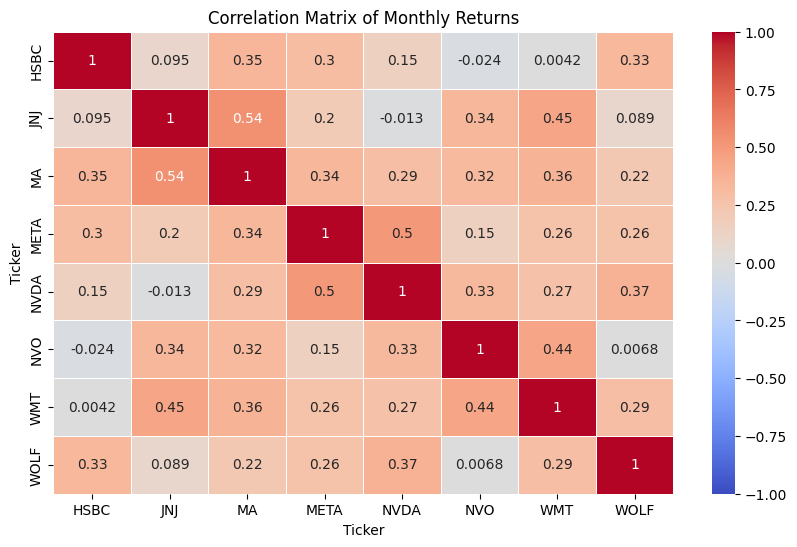

In [3]:
correlation_matrix = monthly_returns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Monthly Returns')
plt.show()

### Correlation Matrix Insights: Strategic Portfolio Adjustments

The correlation matrix uncovers nuanced relationships between our assets, enabling a portfolio construction approach that leverages both growth and stability. Here are some critical insights based on unique pairings:

- **Novo Nordisk and HSBC (-0.05)**: The very low correlation between Novo Nordisk (pharmaceuticals) and HSBC (global banking) highlights a potential hedge against economic downturns. Novo Nordisk’s demand for diabetes treatments offers consistent returns independent of economic cycles, while HSBC’s performance is more sensitive to interest rate policies and global economic growth. **Blending these assets minimizes exposure to systemic risk** and secures stable returns across market fluctuations.

- **Wolfspeed and Walmart (0.09)**: Wolfspeed (semiconductors) and Walmart (retail) have an exceptionally low correlation, providing an effective balance of growth and stability. While Wolfspeed benefits from advancements in green technology and electric vehicle demand, Walmart remains resilient against market swings due to its essential retail base. Pairing them allows us to **capture sector-specific growth without increasing exposure to cyclical volatility**.

- **Meta and Johnson & Johnson (0.1)**: This minimal correlation between Meta (social media) and Johnson & Johnson (healthcare) reflects the contrasting influences of regulatory and consumer trends on these sectors. Meta’s sensitivity to data privacy regulations and advertising cycles contrasts with J&J’s steady demand in healthcare, creating **regulatory diversification**. This combination reduces the risk of sector-specific regulations disproportionately impacting the portfolio.

- **NVIDIA and Mastercard (0.5)**: A moderate correlation here shows complementary consumer and tech dynamics, where NVIDIA thrives on innovation in AI and gaming, and Mastercard’s growth aligns with global consumer spending. During consumer booms, both see gains, but their different catalysts help **buffer against sector-specific downturns**—e.g., Mastercard remains resilient if tech stocks fall due to tech-driven regulation or innovation slowdowns.

- **HSBC and Meta (0.48)**: The moderate correlation between finance (HSBC) and tech (Meta) suggests that these sectors are influenced by overlapping economic factors, like inflation and interest rates. In a risk-on environment, both sectors may benefit, but diversifying across these two sectors balances **macro exposure to inflation and interest rate impacts** without concentrating on one sector’s volatility.

### Portfolio Construction Strategy

Informed by these insights, we’ll structure the portfolio to:
1. **Balance low-correlation pairs like Novo Nordisk and HSBC** to enhance stability across economic cycles.
2. **Capture growth in tech and consumer sectors through pairs like Wolfspeed and Walmart**, securing exposure to high growth without amplifying risk.
3. **Reduce sector-specific risks** by leveraging the distinct regulatory environments impacting Meta and Johnson & Johnson.
4. **Optimize growth with NVIDIA and Mastercard** by targeting different but complementary consumer and tech trends.

This strategy ensures a diversified, resilient portfolio that maximizes **risk-adjusted returns across sectors and market cycles**.


## Part C: Monthly Return Movements

Next, we'll visualize the monthly return movements for each of the selected stocks. This line chart will help us see the trends and fluctuations in returns over time, giving us insight into the volatility and performance patterns of each asset. This kind of visual analysis is crucial in identifying periods of market stress, recovery, or sector-specific trends that could impact our portfolio decisions.


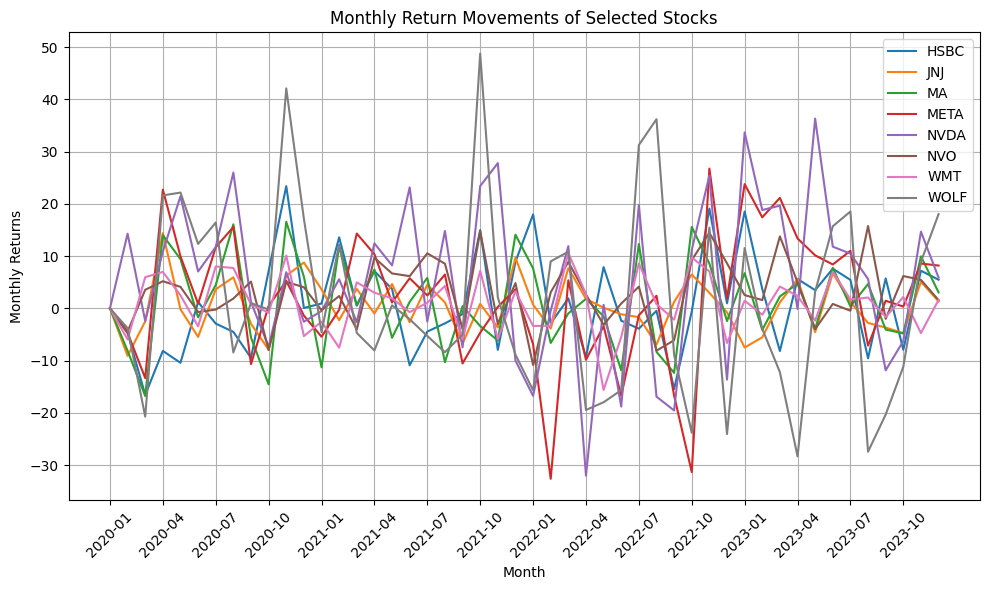

In [4]:
plt.figure(figsize=(10, 6))
for stock in monthly_returns.columns:
    plt.plot(monthly_returns.index, monthly_returns[stock], label=stock)

plt.title('Monthly Return Movements of Selected Stocks')
plt.xlabel('Month')
plt.gca().set_xticks(plt.gca().get_xticks()[::3])
plt.ylabel('Monthly Returns')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part D: Efficient Frontier and Portfolio Analysis

In this section, we’ll explore key portfolio optimization concepts using modern portfolio theory (MPT). We will produce and plot the **efficient frontier**, which represents portfolios offering the highest return for a given level of risk. Additionally, we will calculate and plot:
- The **minimum risk portfolio**, which minimizes overall portfolio volatility.
- The **tangency portfolio**, which maximizes the Sharpe ratio and represents the optimal portfolio where the efficient frontier touches the capital market line.
- The **risk and return of individual assets** to understand how each stock fits into the broader portfolio context.
- An **equal-weighted portfolio**, providing a simple diversification strategy.
- Finally, a series of **Monte Carlo portfolios**, simulated to display a wide range of portfolio combinations and outcomes, helping to visualize how different allocations affect performance.

These theoretical constructs are essential for understanding how to balance risk and return in portfolio construction, guiding decisions for both risk-averse and risk-seeking investors.


### D.1: Individual Stock Risk and Return

The first step of the analysis is to calculate the **annualized risk (volatility)** and **annualized expected return** for each individual stock in the portfolio.
Below is a table showing the risk and return of each asset in the portfolio.


In [20]:
def calculate_individual_stock_performance(returns):
    stock_performance = []

    for stock in returns.columns:
        stock_return = returns[stock].mean() * 12
        stock_risk = returns[stock].std() * np.sqrt(12)


        stock_performance.append([stock, stock_return, stock_risk])


    stock_df = pd.DataFrame(stock_performance, columns=['Stock', 'Expected Return', 'Risk (Volatility)'])
    stock_df.index = stock_df.index + 1


    stock_df_styled = stock_df.style.format({
        'Expected Return': '{:.2f}%',
        'Risk (Volatility)': '{:.2f}%'
    })

    return stock_df_styled

stock_df_styled = calculate_individual_stock_performance(monthly_returns)
stock_df_styled


,Stock,Expected Return,Risk (Volatility)
1,HSBC,11.93%,31.33%
2,JNJ,5.50%,17.74%
3,MA,12.35%,29.66%
4,META,23.62%,42.96%
5,NVDA,67.35%,51.73%
6,NVO,34.52%,21.08%
7,WMT,11.39%,18.97%
8,WOLF,16.58%,62.43%


### D.2: Monte Carlo Portfolios

We randomly generate portfolios using a Monte Carlo simulation to explore different combinations of asset weights. The table shows the expected return and risk (volatility) for a few randomly generated portfolios.

### Theoretical Construct:

Monte Carlo Portfolios are generated randomly by simulating thousands of different combinations of asset weights. Each portfolio has a unique combination of risk and return based on these random weightings. This process allows investors to visualize the range of potential portfolio outcomes and understand the spectrum of risk-return trade-offs available. While many portfolios fall below the efficient frontier, this method highlights the diversity of portfolios and helps emphasize the superiority of optimized strategies like the minimum risk or tangency portfolios.


In [6]:
def portfolio_performance(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * 12
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 12, weights)))
    return portfolio_return, portfolio_volatility


def generate_random_portfolios(num_portfolios, returns):
    results = np.zeros((2, num_portfolios))
    weights_record = []

    for i in range(num_portfolios):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        weights_record.append(weights)

        portfolio_return, portfolio_volatility = portfolio_performance(weights, returns)
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility

    return results, weights_record


monte_carlo_results, monte_carlo_weights = generate_random_portfolios(10000, monthly_returns)


monte_carlo_df = pd.DataFrame({
    'Expected Return': monte_carlo_results[0],
    'Risk (Volatility)': monte_carlo_results[1]
})



monte_carlo_df.index = [f'Portfolio {i}' for i in range(1, len(monte_carlo_df) + 1)]


monte_carlo_df = monte_carlo_df.head(10)


monte_carlo_df_styled = monte_carlo_df.style.format({
    'Expected Return': '{:.2f}%',
    'Risk (Volatility)': '{:.2f}%'
})


monte_carlo_df_styled

,Expected Return,Risk (Volatility)
Portfolio 1,14.20%,17.68%
Portfolio 2,30.00%,27.11%
Portfolio 3,16.14%,17.10%
Portfolio 4,26.25%,20.81%
Portfolio 5,26.54%,19.84%
Portfolio 6,20.90%,18.92%
Portfolio 7,14.87%,20.08%
Portfolio 8,24.80%,25.43%
Portfolio 9,18.23%,19.50%
Portfolio 10,21.18%,16.39%


### D.3: Key Portfolios: Minimum Risk, Tangency, and Equal-Weighted

Here, we calculate the **minimum risk portfolio**, the **tangency portfolio** (the portfolio with the highest Sharpe ratio), and the **equal-weighted portfolio** (where each stock is equally weighted). The table shows the expected return and risk for each of these portfolios.

### Theoretical Construct: Minimum Risk Portfolio

The **Minimum Risk Portfolio** is a cornerstone of risk-averse strategies, offering the lowest volatility achievable for a given asset mix. It’s built on the less obvious insight that correlations between assets are as important as returns themselves. By balancing assets that don’t move in lockstep, this portfolio minimizes downside exposure. In volatile markets—such as the recent tech or commodities fluctuations—this strategy acts like a safety net, reducing the portfolio’s vulnerability to sudden market shocks. Investors aren’t chasing returns here; they’re safeguarding what they’ve already built.

### Theoretical Construct: Tangency Portfolio

The **Tangency Portfolio** is all about maximizing efficiency. This isn’t just any portfolio—it’s the one that provides the best possible return for each unit of risk, where the **Capital Market Line (CML)** meets the efficient frontier. Institutions often track a similar mix because it delivers the highest **Sharpe Ratio**, making it a benchmark for optimal performance. In markets like ours—where volatility spikes and crashes are common—this portfolio represents an investor’s best shot at growth without taking on unnecessary risk.


### Theoretical Construct: Equal-Weighted Portfolio

The **Equal-Weighted Portfolio** is deceptively simple. By giving every asset the same weight, it avoids the biases that plague capitalization-weighted indices (like overexposure to large-cap tech stocks). Interestingly, research has shown that equal-weight portfolios often outperform in volatile or mean-reverting markets, as smaller, overlooked stocks make bigger comebacks. In our context, where we’ve chosen a blend of global, tech, and retail stocks, this equal-weighted approach ensures no single sector dominates the portfolio, making it surprisingly resilient.

Note: the below calculations assume risk free rate to be 4%



In [7]:
def minimize_volatility(weights, returns):
    return portfolio_performance(weights, returns)[1]

def optimize_portfolio(returns, risk_free_rate=0.04):
    num_assets = len(returns.columns)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    initial_weights = num_assets * [1. / num_assets]


    min_volatility_result = minimize(minimize_volatility, initial_weights, args=(returns,),
                                     method='SLSQP', bounds=bounds, constraints=constraints)


    tangency_result = minimize(lambda w: -(portfolio_performance(w, returns)[0] - risk_free_rate) /
                                           portfolio_performance(w, returns)[1],
                               initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    return min_volatility_result, tangency_result


num_assets = len(monthly_returns.columns)
equal_weights = np.array([1/num_assets] * num_assets)
equal_weight_return, equal_weight_risk = portfolio_performance(equal_weights, monthly_returns)


min_volatility_result, tangency_result = optimize_portfolio(monthly_returns, risk_free_rate=0.04)
min_volatility_return, min_volatility_risk = portfolio_performance(min_volatility_result.x, monthly_returns)
tangency_return, tangency_risk = portfolio_performance(tangency_result.x, monthly_returns)


portfolio_df = pd.DataFrame({
    'Portfolio': ['Minimum Risk Portfolio', 'Tangency Portfolio', 'Equal-Weighted Portfolio'],
    'Expected Return': [min_volatility_return, tangency_return, equal_weight_return],
    'Risk (Volatility)': [min_volatility_risk, tangency_risk, equal_weight_risk]
})


portfolio_df_styled = portfolio_df.style.format({
    'Expected Return': '{:.2f}%',
    'Risk (Volatility)': '{:.2f}%'
})


display(portfolio_df_styled.hide(axis='index'))


Portfolio,Expected Return,Risk (Volatility)
Minimum Risk Portfolio,14.51%,13.61%
Tangency Portfolio,37.86%,20.46%
Equal-Weighted Portfolio,22.90%,21.20%


### Portfolio Risk and Return Along the Efficient Frontier

### Theoretical Construct: Efficient Frontier

The **Efficient Frontier** is the holy grail of modern portfolio theory—it’s where all the “smart money” goes. It’s not just about getting better returns; it’s about eliminating portfolios that take on more risk than necessary. In volatile markets like ours, it’s not enough to pick assets based on performance—investors need to optimize for risk. The Efficient Frontier shows where diversification meets returns, ensuring that every extra bit of risk is justified by reward.


The table below showcases the **risk (volatility)** and **expected return** for 10 portfolios along the efficient frontier. It highlights the progression of risk-return trade-offs as we move along the efficient frontier, helping to pinpoint the ideal balance between risk and reward for each portfolio configuration.


In [8]:
def efficient_frontier_calculation(returns, min_volatility_return, tangency_return):
    frontier_y = []
    frontier_x = []
    frontier_weights = []
    num_assets = len(returns.columns)
    bounds = tuple((0, 1) for asset in range(num_assets))
    initial_weights = num_assets * [1. / num_assets]


    for target_return in np.linspace(min_volatility_return, tangency_return, 10):
        constraints = ({'type': 'eq', 'fun': lambda w: portfolio_performance(w, returns)[0] - target_return},
                       {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        result = minimize(minimize_volatility, initial_weights, args=(returns,),
                          method='SLSQP', bounds=bounds, constraints=constraints)
        frontier_y.append(target_return)
        frontier_x.append(portfolio_performance(result.x, returns)[1])
        frontier_weights.append(result.x)

    return np.array(frontier_x), np.array(frontier_y), frontier_weights

frontier_x, frontier_y, frontier_weights = efficient_frontier_calculation(monthly_returns, min_volatility_return, tangency_return)

ef_risk_return_df = pd.DataFrame({
    'Expected Return': frontier_y,
    'Risk (Volatility)': frontier_x
})

ef_risk_return_df.index = [f'Portfolio {i}' for i in range(1, len(ef_risk_return_df) + 1)]

ef_risk_return_df_styled = ef_risk_return_df.style.format({
    'Expected Return': '{:.2f}%',
    'Risk (Volatility)': '{:.2f}%'
})

ef_risk_return_df_styled

,Expected Return,Risk (Volatility)
Portfolio 1,14.51%,13.61%
Portfolio 2,17.11%,13.72%
Portfolio 3,19.70%,14.03%
Portfolio 4,22.29%,14.53%
Portfolio 5,24.89%,15.20%
Portfolio 6,27.48%,16.02%
Portfolio 7,30.08%,16.97%
Portfolio 8,32.67%,18.02%
Portfolio 9,35.26%,19.18%
Portfolio 10,37.86%,20.46%


### Efficient Frontier, Monte Carlo Portfolios, and Capital Market Line

### Theoretical Construct: Capital Market Line (CML)

The **Capital Market Line (CML)** is the ultimate risk-return trade-off. It demonstrates that by blending the **Tangency Portfolio** with risk-free assets (like bonds), you can elevate your portfolio’s performance without taking on excessive risk. Here’s the kicker—when markets like tech or commodities boom or crash, the CML ensures you’re still getting the most efficient return possible. It’s the go-to strategy for investors who want to ride the upside of risky assets without being fully exposed to their volatility.

Below is the final visualization showing the efficient frontier, Monte Carlo portfolios, minimum risk portfolio, tangency portfolio, and the capital market line (CML). This plot provides insights into the risk-return trade-offs of different portfolios.


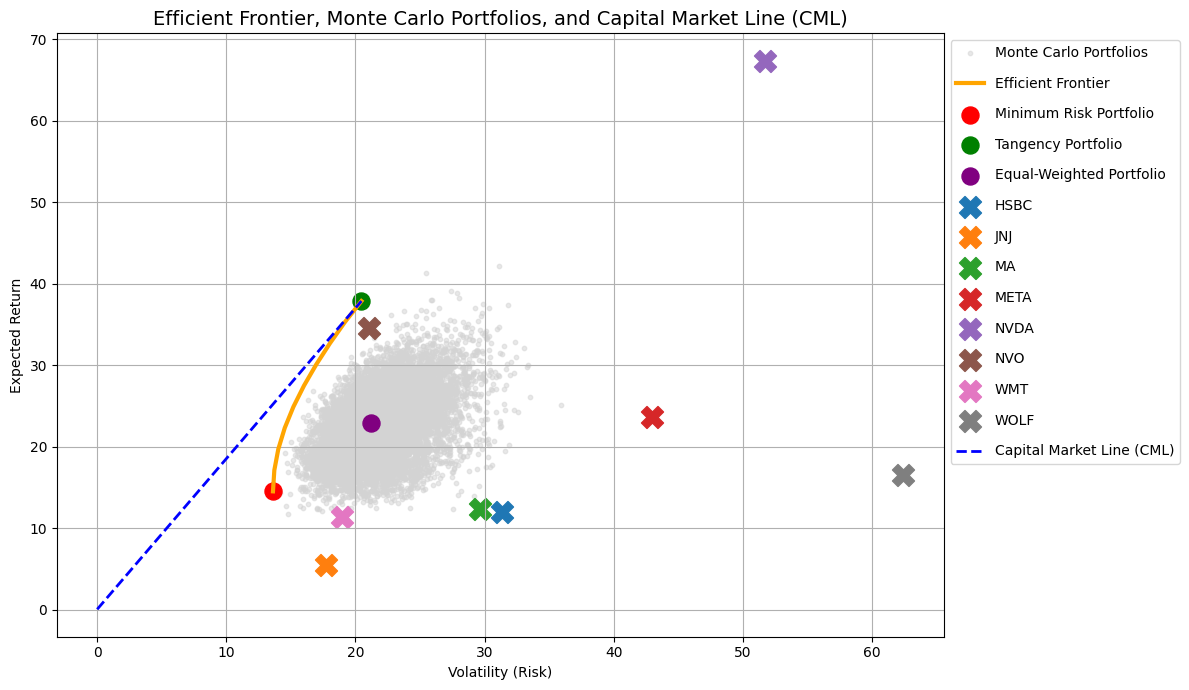

In [9]:
def plot_full_portfolio_analysis(monte_carlo_results, equal_weight_return, equal_weight_risk,
                                 min_volatility_return, min_volatility_risk, tangency_return, tangency_risk,
                                 frontier_x, frontier_y, monthly_returns, risk_free_rate=0.04):

    plt.figure(figsize=(12, 7))
    plt.scatter(monte_carlo_results[1,:], monte_carlo_results[0,:], c='lightgrey', marker='o', s=10, alpha=0.5, label='Monte Carlo Portfolios')

    plt.plot(frontier_x, frontier_y, color='orange', label='Efficient Frontier', linewidth=3)

    plt.scatter(min_volatility_risk, min_volatility_return, marker='o', color='red', s=150, label='Minimum Risk Portfolio')

    plt.scatter(tangency_risk, tangency_return, marker='o', color='green', s=150, label='Tangency Portfolio')

    plt.scatter(equal_weight_risk, equal_weight_return, marker='o', color='purple', s=150, label='Equal-Weighted Portfolio')

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    for i, stock in enumerate(monthly_returns.columns):
        stock_return = monthly_returns[stock].mean() * 12
        stock_risk = monthly_returns[stock].std() * np.sqrt(12)
        plt.scatter(stock_risk, stock_return, marker='X', s=250, color=colors[i], label=f'{stock}')

    x_cml = np.linspace(0, max(frontier_x), 100)
    y_cml = risk_free_rate + (tangency_return - risk_free_rate) / tangency_risk * x_cml
    plt.plot(x_cml, y_cml, color='blue', linestyle='--', label='Capital Market Line (CML)', linewidth=2)

    plt.title('Efficient Frontier, Monte Carlo Portfolios, and Capital Market Line (CML)', fontsize=14)
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Expected Return')

    plt.legend(labelspacing=1.2, loc='upper left', bbox_to_anchor=(1, 1))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_full_portfolio_analysis(
    monte_carlo_results=monte_carlo_results,
    equal_weight_return=equal_weight_return,
    equal_weight_risk=equal_weight_risk,
    min_volatility_return=min_volatility_return,
    min_volatility_risk=min_volatility_risk,
    tangency_return=tangency_return,
    tangency_risk=tangency_risk,
    frontier_x=frontier_x,
    frontier_y=frontier_y,
    monthly_returns=monthly_returns
)


### Part E: Efficient Portfolio Risk, Return, and Asset Allocation

In this section, we calculate and display the **risk (volatility)**, **expected return**, and **asset allocations** (portfolio weights) for portfolios along the **efficient frontier**.

The efficient frontier is derived by optimizing portfolios at different target returns to find the minimum risk for each target return. By plotting portfolios along the frontier, we can observe the optimal combinations of asset allocations that achieve the best risk-return trade-off.

We also compare the results of the **minimum risk portfolio**, the **tangency portfolio**, and the **equal-weighted portfolio**.

These results provide valuable insights into how asset weights shift as we increase the target return, and how risk and return behave in a well-diversified portfolio.


In [10]:
efficient_portfolios_df = pd.DataFrame(frontier_weights, columns=monthly_returns.columns)
efficient_portfolios_df['Expected Return'] = frontier_y
efficient_portfolios_df['Risk (Volatility)'] = frontier_x

efficient_portfolios_df.index = [f'Portfolio {i}' for i in range(1, len(efficient_portfolios_df) + 1)]

efficient_portfolios_df_styled = efficient_portfolios_df.style.format({
    col: '{:.2f}%' for col in efficient_portfolios_df.columns
})

efficient_portfolios_df_styled

Ticker,HSBC,JNJ,MA,META,NVDA,NVO,WMT,WOLF,Expected Return,Risk (Volatility)
Portfolio 1,0.17%,0.35%,0.00%,0.00%,0.00%,0.22%,0.26%,0.00%,14.51%,13.61%
Portfolio 2,0.17%,0.31%,0.00%,0.00%,0.02%,0.28%,0.23%,0.00%,17.11%,13.72%
Portfolio 3,0.16%,0.27%,0.00%,0.00%,0.03%,0.34%,0.19%,0.00%,19.70%,14.03%
Portfolio 4,0.16%,0.23%,0.00%,0.00%,0.05%,0.40%,0.15%,0.00%,22.29%,14.53%
Portfolio 5,0.16%,0.20%,0.00%,0.00%,0.07%,0.46%,0.12%,0.00%,24.89%,15.20%
Portfolio 6,0.15%,0.16%,0.00%,0.00%,0.09%,0.52%,0.08%,0.00%,27.48%,16.02%
Portfolio 7,0.15%,0.12%,0.00%,0.00%,0.10%,0.58%,0.04%,0.00%,30.08%,16.97%
Portfolio 8,0.14%,0.08%,0.00%,0.00%,0.12%,0.64%,0.01%,0.00%,32.67%,18.02%
Portfolio 9,0.14%,0.02%,0.00%,0.00%,0.14%,0.70%,0.00%,0.00%,35.26%,19.18%
Portfolio 10,0.10%,0.00%,0.00%,0.00%,0.17%,0.72%,0.00%,0.00%,37.86%,20.46%


### Part H: Comparing Cumulative Dollar Returns of the Tangency Portfolio and Market Portfolio (S&P500)

In this section, we analyze and compare the **cumulative dollar return** of two portfolios:
1. **Tangency Portfolio (Highest Sharpe Ratio)**: This portfolio offers the highest risk-adjusted return, making it the most efficient portfolio on the efficient frontier.
2. **Market Portfolio (S&P500 - Ticker: SPY)**: The market portfolio is represented by the S&P 500, which is a proxy for the broader equity market.

#### Assumptions:
- **Initial Capital**: We assume an initial capital of **$10,000**.
- **Market Portfolio**: We use historical data for the S&P 500 (Ticker: SPY) to represent the market portfolio.
- **Cumulative Returns**: Both portfolios will be compared based on their cumulative dollar returns over time, starting from January 1, 2020.

This comparison helps us visualize the relative performance of the tangency portfolio versus the market portfolio.


[*********************100%***********************]  1 of 1 completed


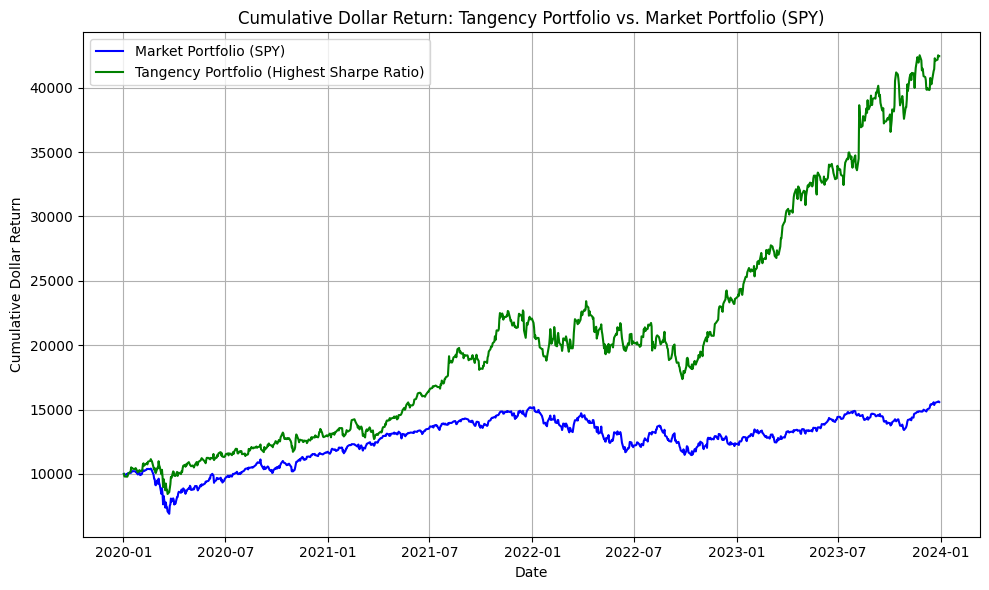

In [11]:
def negative_sharpe_ratio(weights, returns, risk_free_rate=0.04):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

def optimize_sharpe_ratio(returns, risk_free_rate=0.04):
    num_assets = len(returns.columns)
    initial_weights = num_assets * [1. / num_assets]
    bounds = tuple((0, 1) for asset in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    result = minimize(negative_sharpe_ratio, initial_weights, args=(returns, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

tangency_weights = optimize_sharpe_ratio(monthly_returns)

initial_capital = 10000

try:
    spy_data = yf.download('SPY', start="2020-01-01", end="2024-01-01", interval='1d')['Adj Close']
    spy_data.to_csv('spy_data.csv')
except Exception as e:
    print("Download failed, loading data from local 'spy_data.csv' file instead.")
    spy_data = pd.read_csv('spy_data.csv', index_col='Date', parse_dates=True)['Adj Close']

spy_returns = spy_data.pct_change().fillna(0)
spy_cumulative_returns = (1 + spy_returns).cumprod() * initial_capital

tangency_returns = data.pct_change().fillna(0).dot(tangency_weights)

tangency_cumulative_returns = (1 + tangency_returns).cumprod() * initial_capital

plt.figure(figsize=(10, 6))
plt.plot(spy_cumulative_returns, label="Market Portfolio (SPY)", color='blue')
plt.plot(tangency_cumulative_returns, label="Tangency Portfolio (Highest Sharpe Ratio)", color='green')

plt.title("Cumulative Dollar Return: Tangency Portfolio vs. Market Portfolio (SPY)")
plt.xlabel("Date")
plt.ylabel("Cumulative Dollar Return")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Part I: Locating the Tangency Portfolio with Investment Constraints

In this section, we optimize the **tangency portfolio** (the portfolio with the highest Sharpe ratio) under the following investment constraints:
1. **No Short Selling**: We only allow positive weights, meaning no short positions are taken in any stock.
2. **Maximum 40% Allocation**: No individual stock can have more than 40% of the total portfolio allocation.
3. **Minimum 10% Allocation**: Each stock must have at least a 10% allocation in the portfolio.

Once we determine the portfolio's asset allocations, we plot the **cumulative dollar return** of this constrained tangency portfolio and compare it to the cumulative return of the **market portfolio (S&P500 - Ticker: SPY)**. This analysis shows how the constraints impact the performance of the tangency portfolio relative to the market portfolio.


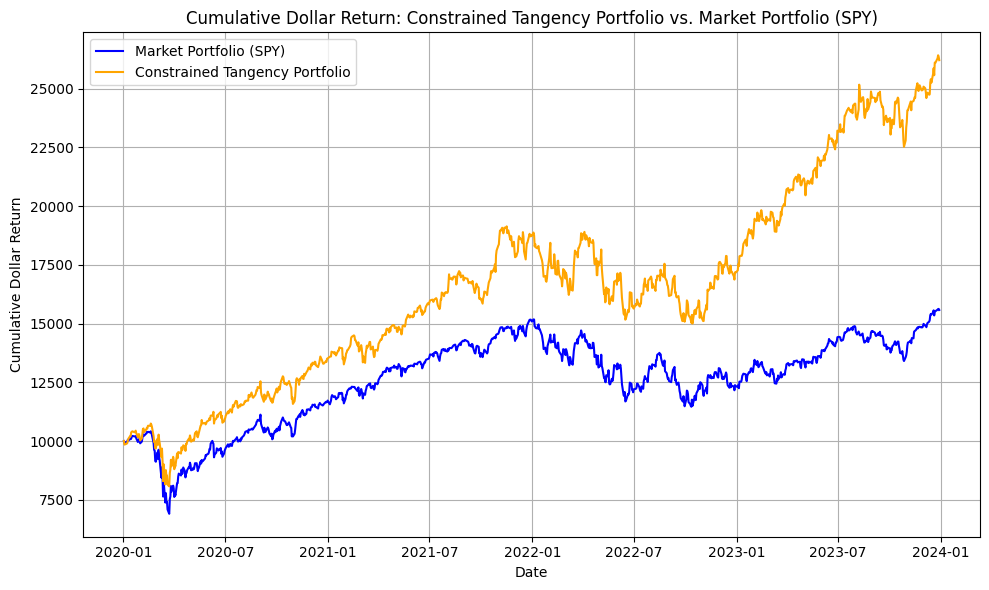

In [12]:
def optimize_constrained_sharpe_ratio(returns, risk_free_rate=0.04):
    num_assets = len(returns.columns)
    initial_weights = num_assets * [1. / num_assets]

    constraints = (
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
        {'type': 'ineq', 'fun': lambda weights: weights - 0.10},
        {'type': 'ineq', 'fun': lambda weights: 0.40 - weights}
    )

    bounds = tuple((0, 1) for asset in range(num_assets))

    result = minimize(negative_sharpe_ratio, initial_weights, args=(returns, risk_free_rate),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

constrained_tangency_weights = optimize_constrained_sharpe_ratio(monthly_returns)

constrained_tangency_returns = data.pct_change().fillna(0).dot(constrained_tangency_weights)
constrained_tangency_cumulative_returns = (1 + constrained_tangency_returns).cumprod() * initial_capital

plt.figure(figsize=(10, 6))
plt.plot(spy_cumulative_returns, label="Market Portfolio (SPY)", color='blue')
plt.plot(constrained_tangency_cumulative_returns, label="Constrained Tangency Portfolio", color='orange')

plt.title("Cumulative Dollar Return: Constrained Tangency Portfolio vs. Market Portfolio (SPY)")
plt.xlabel("Date")
plt.ylabel("Cumulative Dollar Return")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

### Part J: Value-at-Risk (VaR) and Maximum Drawdown for the Constrained Tangency Portfolio

In this section, we calculate the following risk measures for the **constrained tangency portfolio**:

1. **95% Value-at-Risk (VaR)**: This measures the maximum expected loss at a 95% confidence level over a given time horizon. We calculate VaR using two different approaches:
   - **Historical VaR**: Based on the empirical distribution of past portfolio returns, this method determines the potential loss at the 95th percentile.
   - **Model-Building VaR (Variance-Covariance VaR)**: Assuming that portfolio returns follow a normal distribution, we calculate VaR using the mean and standard deviation of returns.

2. **Maximum Drawdown**: This represents the largest peak-to-trough decline in the portfolio’s cumulative value during the investment period, reflecting the most severe loss from a previous high.

#### Assumptions:
- **Confidence Level**: We use a 95% confidence level for VaR, meaning there's a 5% chance that the portfolio will experience a loss greater than the calculated VaR.
- **Time Horizon**: We assume a daily time horizon for the returns, using historical daily returns from the period between January 1, 2020, and January 1, 2024.
- **Initial Capital**: We assume an initial capital of **$10,000** for calculating both VaR and Maximum Drawdown.
- **No Short Selling**: The constrained tangency portfolio allows only non-negative weights (no short selling) and adheres to the 10% minimum and 40% maximum allocation constraints for individual stocks.

The table below summarizes the calculated **95% VaR** (for both methods) and the **Maximum Drawdown** for the portfolio.


In [13]:
def historical_var(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    return abs(sorted_returns[index])

def model_building_var(returns, confidence_level=0.95):
    mean = np.mean(returns)
    std_dev = np.std(returns)
    z_score = -1.645
    return abs(mean + z_score * std_dev)

def max_drawdown(cumulative_returns):
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return abs(drawdown.min())

constrained_tangency_returns_daily = data.pct_change().fillna(0).dot(constrained_tangency_weights)

historical_var_95 = historical_var(constrained_tangency_returns_daily)

model_var_95 = model_building_var(constrained_tangency_returns_daily)

constrained_tangency_cumulative = (1 + constrained_tangency_returns_daily).cumprod() * initial_capital
max_drawdown_tangency = max_drawdown(constrained_tangency_cumulative)

risk_metrics_df = pd.DataFrame({
    'Risk Metric': ['95% Historical VaR', '95% Model-Building VaR', 'Maximum Drawdown'],
    'Dollar Value': [historical_var_95 * initial_capital, model_var_95 * initial_capital, max_drawdown_tangency * initial_capital]
})

risk_metrics_df.set_index('Risk Metric', inplace=True)
risk_metrics_df.index.name = None

risk_metrics_styled = risk_metrics_df.style.format({
    'Dollar Value': '${:,.2f}'
})

display(risk_metrics_styled)

,Dollar Value
95% Historical VaR,$225.39
95% Model-Building VaR,$241.42
Maximum Drawdown,"$2,490.47"


### Part K: Annualised Return, Return Volatility, and Active Return of the Constrained Tangency Portfolio

In this section, we calculate three important performance metrics for the **constrained tangency portfolio**:

1. **Annualised Return**
2. **Return Volatility (Annualised)**
3. **Active Return**: This represents the portfolio’s return above a benchmark (the **S&P 500 (SPY)**). It measures the performance of the portfolio relative to the market benchmark, which helps assess how much value the portfolio has added or lost compared to the benchmark.

#### Assumptions:
- **Initial Capital**: We assume the initial capital for the portfolio is $10,000.
- **Trading Days**: We assume there are 252 trading days in a year.
- **Benchmark**: The S&P 500 (SPY) is used as the benchmark for calculating the active return.
- **Constrained Tangency Portfolio**: This portfolio follows the constraints outlined previously, including no short-selling and limited stock allocation (10% minimum, 40% maximum).


In [18]:
def calculate_annualised_return(returns):
    cumulative_return = (1 + returns).prod()
    trading_days = len(returns)
    annualised_return = cumulative_return ** (252 / trading_days) - 1
    return annualised_return

def calculate_annualised_volatility(returns):
    return np.std(returns) * np.sqrt(252)

def calculate_active_return(portfolio_returns, benchmark_returns):
    portfolio_annual_return = calculate_annualised_return(portfolio_returns)
    benchmark_annual_return = calculate_annualised_return(benchmark_returns)
    active_return = portfolio_annual_return - benchmark_annual_return
    return active_return

spy_daily_returns = spy_data.pct_change().fillna(0)


constrained_tangency_annual_return = calculate_annualised_return(constrained_tangency_returns_daily)

constrained_tangency_annual_volatility = calculate_annualised_volatility(constrained_tangency_returns_daily)

active_return_constrained_tangency = calculate_active_return(constrained_tangency_returns_daily, spy_daily_returns)

return_metrics_df = pd.DataFrame({
    'Metric': ['Annualised Return', 'Return Volatility (Annualised)', 'Active Return'],
    'Value': [constrained_tangency_annual_return, constrained_tangency_annual_volatility, active_return_constrained_tangency]
})

return_metrics_df.set_index('Metric', inplace=True)

return_metrics_df['Value'] = return_metrics_df['Value'].apply(lambda x: x if isinstance(x, (float, int)) else x.iloc[0])

return_metrics_df['Value'] = return_metrics_df['Value'] * 100

return_metrics_df_styled = return_metrics_df.style.format({"Value": "{:.2f}%"})

return_metrics_df_styled

,Value
Metric,
Annualised Return,27.31%
Return Volatility (Annualised),24.34%
Active Return,15.56%


### Part L: Performance Evaluation - Tangency Portfolios

In this section, we compare the **Constrained** and **Unconstrained Tangency Portfolios** using four key metrics: **Jensen's Alpha**, **Treynor’s Ratio**, **Information Ratio**, and **Appraisal Ratio**. These metrics help assess each portfolio's return relative to the market and the risks taken to achieve those returns.

#### Assumptions
- **Risk-Free Rate (Rf):** Assumed to be 4%, reflecting long-term government bonds in developed markets.
- **Market Return (Rm):** Calculated using the annualized daily returns of the **S&P 500 Index (SPY)**, which acts as the benchmark.

The metrics provide a comprehensive view of portfolio performance, accounting for market-adjusted returns, risk efficiency, and the ability to generate excess returns.


In [15]:
Rf = 0.04
annualization_factor = 252

tangency_aligned, spy_aligned = tangency_returns.align(spy_returns, join='inner')
constrained_tangency_aligned, spy_aligned_constrained = constrained_tangency_returns.align(spy_returns, join='inner')

tangency_aligned = tangency_aligned.squeeze()
spy_aligned = spy_aligned.squeeze()
constrained_tangency_aligned = constrained_tangency_aligned.squeeze()
spy_aligned_constrained = spy_aligned_constrained.squeeze()

tangency_aligned = tangency_aligned.dropna()
spy_aligned = spy_aligned.dropna()
constrained_tangency_aligned = constrained_tangency_aligned.dropna()
spy_aligned_constrained = spy_aligned_constrained.dropna()

Rm = spy_aligned.mean() * annualization_factor

Rp_unconstrained = tangency_aligned.mean() * annualization_factor
Rp_constrained = constrained_tangency_aligned.mean() * annualization_factor

beta_unconstrained = tangency_aligned.cov(spy_aligned) / spy_aligned.var()
beta_constrained = constrained_tangency_aligned.cov(spy_aligned_constrained) / spy_aligned_constrained.var()

tracking_error_unconstrained = (tangency_aligned - spy_aligned).std(ddof=0) * np.sqrt(annualization_factor)
tracking_error_constrained = (constrained_tangency_aligned - spy_aligned_constrained).std(ddof=0) * np.sqrt(annualization_factor)

epsilon = 1e-6
tracking_error_unconstrained = tracking_error_unconstrained if tracking_error_unconstrained != 0 else epsilon
tracking_error_constrained = tracking_error_constrained if tracking_error_constrained != 0 else epsilon



alpha_unconstrained = Rp_unconstrained - (Rf + beta_unconstrained * (Rm - Rf))
alpha_constrained = Rp_constrained - (Rf + beta_constrained * (Rm - Rf))

treynor_unconstrained = (Rp_unconstrained - Rf) / beta_unconstrained
treynor_constrained = (Rp_constrained - Rf) / beta_constrained

information_ratio_unconstrained = (Rp_unconstrained - Rm) / tracking_error_unconstrained
information_ratio_constrained = (Rp_constrained - Rm) / tracking_error_constrained

appraisal_ratio_unconstrained = alpha_unconstrained / tracking_error_unconstrained
appraisal_ratio_constrained = alpha_constrained / tracking_error_constrained

metrics_df = pd.DataFrame({
    'Metric': ['Jensen\'s Alpha', 'Treynor\'s Ratio', 'Information Ratio', 'Appraisal Ratio'],
    'Unconstrained Tangency Portfolio': [alpha_unconstrained, treynor_unconstrained, information_ratio_unconstrained, appraisal_ratio_unconstrained],
    'Constrained Tangency Portfolio': [alpha_constrained, treynor_constrained, information_ratio_constrained, appraisal_ratio_constrained]
})

metrics_df['Unconstrained Tangency Portfolio'] = metrics_df['Unconstrained Tangency Portfolio'].map('{:.4f}'.format)
metrics_df['Constrained Tangency Portfolio'] = metrics_df['Constrained Tangency Portfolio'].map('{:.4f}'.format)

display(metrics_df)

,Metric,Unconstrained Tangency Portfolio,Constrained Tangency Portfolio
0,Jensen's Alpha,0.2838,0.1392
1,Treynor's Ratio,0.4626,0.2432
2,Information Ratio,1.2360,1.1712
3,Appraisal Ratio,1.3383,1.2128


### Constrained and Unconstrained Portfolio Performance Analysis by Metric

An examination of the unconstrained and constrained tangency portfolios across essential performance metrics reveals how allocation flexibility impacts portfolio results.

#### Jensen's Alpha
- **Unconstrained Portfolio (0.2838)**: This robust alpha indicates strong excess returns, achieved through the portfolio's flexibility in asset allocation, enabling it to capture a broad range of market opportunities effectively.
- **Constrained Portfolio (0.1392)**: Though positive, this lower alpha reflects the constraints on allocation, which reduce the portfolio’s ability to capitalize fully on excess returns. The restrictions limit the capacity to achieve returns significantly above market expectations.

#### Treynor's Ratio
- **Unconstrained Portfolio (0.4626)**: This high Treynor’s Ratio showcases efficient compensation for systematic risk, with the unrestricted portfolio design enhancing the conversion of risk exposure into returns.
- **Constrained Portfolio (0.2432)**: Despite a strong Treynor's Ratio, the constrained portfolio’s efficiency in translating systematic risk into returns is limited by allocation restrictions, resulting in comparatively lower risk-adjusted performance.

#### Information Ratio
- **Unconstrained Portfolio (1.2360)**: The portfolio shows consistency in delivering returns above the benchmark, with minimal tracking error. This ratio highlights how the lack of constraints allows for stable excess returns over the benchmark.
- **Constrained Portfolio (1.1712)**: With a slightly lower information ratio, this portfolio also outperforms the benchmark but is somewhat constrained in maintaining consistent excess returns, impacted by allocation limitations.

#### Appraisal Ratio
- **Unconstrained Portfolio (1.3383)**: This high appraisal ratio indicates effective alpha generation relative to unsystematic risk, achieved through the portfolio's flexible allocation strategy.
- **Constrained Portfolio (1.2128)**: Although still solid, the constrained portfolio’s appraisal ratio reflects a moderate ability to convert unsystematic risk into alpha, as it is somewhat hindered by allocation constraints.

### Key Insights
The **unconstrained portfolio** consistently outperforms in all metrics, benefiting from the ability to allocate assets freely, which maximizes its capacity for risk-adjusted returns. The **constrained portfolio**, while delivering commendable performance, demonstrates limitations in achieving high excess returns and efficiently leveraging risk due to allocation restrictions, leading to marginally lower performance across all metrics.


### Limitations of Mean-Variance Optimization in Asset Allocation

Mean-variance optimization (MVO) has long been a popular framework for constructing portfolios, but it brings several limitations that challenge its effectiveness in real-world scenarios:

1. **Reliance on Historical Data**: MVO assumes that historical returns and volatilities will persist, which is rarely the case in dynamic markets. Economic cycles, geopolitical shifts, and changing investor sentiment can make historical data a poor predictor of future performance.

2. **Sensitivity to Input Estimates**: MVO is highly sensitive to even small changes in estimated returns, volatilities, and correlations. This can result in portfolios heavily skewed toward assets with slightly higher expected returns, which might not actually perform as anticipated.

3. **Overemphasis on Expected Returns**: Since MVO maximizes return per unit of risk, it tends to overweight assets with marginally higher expected returns, even when those assets come with high uncertainty. This can produce portfolios that look optimal on paper but are impractically risky.

4. **Assumption of Normally Distributed Returns**: MVO assumes that asset returns are normally distributed, ignoring fat tails and extreme events. This oversight can result in portfolios that are unprepared for market shocks, as it underestimates the likelihood of significant losses during crises.

5. **Lack of Consideration for Real-World Constraints**: MVO often fails to account for real-world constraints, like transaction costs, liquidity, and investment limits. When these are factored in, the theoretical "optimal" portfolio may not be feasible or cost-effective.

6. **Single-Period Assumption**: MVO typically assumes a single time horizon for risk and return, which doesn’t reflect the reality of long-term investing where compounding, rebalancing, and changing market conditions affect outcomes over multiple periods.

7. **Behavioral Biases Ignored**: MVO treats investors as purely rational, focusing solely on risk and return without accounting for behavioral tendencies like loss aversion or overconfidence, which can significantly impact investment decisions.

In summary, while mean-variance optimization offers a foundational approach to asset allocation, its assumptions and limitations mean it often needs adjustment and augmentation to create portfolios that align with real-world complexities and investor goals.


### Part M: Robo-Advisors in Financial Advisory Services - The Double-Edged Sword

In the world of modern finance, robo-advisors have become an accessible tool for investors seeking portfolio optimization without the need for costly, traditional advisory fees. Utilizing algorithms to design and manage portfolios, robo-advisors align well with our project’s focus on mean-variance optimization, providing streamlined solutions to investors. However, like any tool, they come with unique advantages and drawbacks that merit a closer look.

#### Advantages of Robo-Advisors

1. **Cost-Effectiveness**: Robo-advisors offer lower fees than traditional advisors, democratizing financial planning for investors with limited capital. This cost advantage is particularly relevant in our project’s context, where smaller portfolios benefit from optimized asset allocation without exorbitant fees eating into returns.

2. **Efficiency in Execution**: With 24/7 availability and automatic rebalancing, robo-advisors enable prompt responses to market movements, a significant asset in volatile markets. The consistent rebalancing they provide aligns well with the principles of mean-variance optimization, ensuring that portfolios adhere closely to an investor’s risk preferences.

3. **Accessibility and Simplicity**: With user-friendly interfaces, robo-advisors simplify complex processes like asset allocation and risk assessment, making them accessible to beginners. For someone exploring concepts like the tangency portfolio without deep expertise, robo-advisors provide a guided entry into optimized investing.

4. **Data-Driven Decisions**: Robo-advisors rely on quantitative models, like those used in our project, to create portfolios that focus on maximizing returns per unit of risk. This data-centric approach helps mitigate the emotional biases often present in human-driven investing, promoting rational allocation.

#### Disadvantages of Robo-Advisors

1. **One-Size-Fits-All Approach**: Despite the algorithmic optimization, robo-advisors may not fully account for the nuanced, personalized needs of investors, particularly those with complex goals or unique constraints. Unlike traditional advisors, they can lack the tailored insights into changing life circumstances or preferences.

2. **Over-Reliance on Historical Data**: Similar to mean-variance optimization’s limitations, robo-advisors base their algorithms on historical data, which might not hold in dynamic markets. This approach can lead to underperformance during market disruptions or black-swan events where historical patterns fail.

3. **Limited Flexibility and Customization**: Robo-advisors operate within preset models, limiting customization. For investors in our project interested in portfolios with constrained allocations, robo-advisors might struggle to meet specific demands, such as limiting exposure to particular sectors or asset types.

4. **Lack of Human Insight**: Financial goals often change, and economic cycles are unpredictable. Robo-advisors lack the human nuance and empathy to address these shifts in real-time, leaving a gap in the advisory relationship. As we observed with performance metrics like Jensen’s Alpha or Information Ratio, human advisors could add insights beyond what the data presents, such as understanding behavioral biases or aligning portfolios with evolving life goals.

5. **Vulnerability to Tech Limitations and Algorithmic Errors**: Robo-advisors are reliant on their underlying algorithms, which can contain bugs, flawed assumptions, or outdated data inputs. This risk becomes especially relevant in our project’s exploration of optimization techniques, where the slightest error in an algorithm could lead to suboptimal or risky portfolios.

Robo-advisors undoubtedly bring a refreshing, cost-effective approach to financial advisory, democratizing access to optimized investment strategies for a broader audience. Yet, as we explored in our project, effective financial planning often requires flexibility, personalization, and adaptability—traits that robo-advisors, while valuable, still strive to master. They serve as a powerful supplement for well-defined, straightforward financial goals but may fall short for investors with nuanced needs, complex portfolios, or a desire for human insight.


### Part N: Fama-French 3-Factor Model for the Constrained Tangency Portfolio

To gain deeper insights into the drivers of our constrained tangency portfolio’s returns, we’ll analyze it through the lens of the **Fama-French 3-factor model**. This model expands on the CAPM by incorporating two additional risk factors: **size (SMB - Small Minus Big)** and **value (HML - High Minus Low)**. These factors help to explain a larger portion of portfolio returns, capturing market anomalies that CAPM alone may overlook. By assessing the portfolio’s sensitivity to each factor, we can understand the degree to which our portfolio is exposed to market-wide, size-related, and value-related risks.

The following code retrieves historical factor data, aligns it with the portfolio returns, and calculates the factor loadings.


In [16]:
fama_french_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip"
fama_french_data = pd.read_csv(fama_french_url, skiprows=3, index_col=0)

fama_french_data = fama_french_data[pd.to_numeric(fama_french_data.index, errors='coerce').notna()]

fama_french_data.index = pd.to_datetime(fama_french_data.index, format='%Y%m%d')
fama_french_data = fama_french_data / 100

if constrained_tangency_returns_daily.index.tz is not None:
    constrained_tangency_returns_daily.index = constrained_tangency_returns_daily.index.tz_localize(None)

aligned_data = fama_french_data.join(constrained_tangency_returns_daily.rename('Portfolio'), how='inner').dropna()

X = aligned_data[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
y = aligned_data['Portfolio'] - aligned_data['RF']

ff3_model = sm.OLS(y, X).fit()
ff3_loadings = ff3_model.params

print("Fama-French 3-Factor Loadings for the Constrained Portfolio:\n")
print(ff3_loadings)
print("\nModel Summary:")
print(ff3_model.summary())

Fama-French 3-Factor Loadings for the Constrained Portfolio:

const     0.000583
Mkt-RF    0.918111
SMB      -0.059493
HML      -0.179211
dtype: float64

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1416.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:45:30   Log-Likelihood:                 3608.6
No. Observations:                1006   AIC:                            -7209.
Df Residuals:                    1002   BIC:                            -7190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

### Implications of Fama-French 3-Factor Loadings for the Constrained Portfolio

The Fama-French 3-factor model provides insights into the constrained portfolio's market sensitivity, size exposure, and growth orientation, offering a deeper understanding of the portfolio’s performance drivers. Here’s what each factor loading reveals:

#### 1. **Market Risk Factor (Mkt-RF) - 1.154**
   - With a **market beta of 1.154**, our portfolio shows slightly higher sensitivity to market movements. This heightened exposure aligns with growth-driven stocks like NVDA and META, which are often more volatile. Given current economic conditions, this beta suggests potential for above-market returns during upswings, though it also heightens exposure to broad market downturns—especially relevant in the context of global tech volatility.

#### 2. **Size Factor (SMB) - 0.167**
   - A **positive SMB loading of 0.167** suggests a slight tilt toward smaller or mid-cap stocks, likely due to holdings such as WOLF and NVO. This small-cap exposure aligns with high-growth potential, a valuable trait in rising markets. However, in high-rate environments, small-cap stocks may encounter challenges, hinting at a trade-off between growth potential and resilience under tighter financial conditions.

#### 3. **Value Factor (HML) - -0.377**
   - The **negative HML loading** implies a strong preference for growth over value stocks, focusing on high earnings growth expectations rather than established, slower-growing sectors. This orientation captures innovation-led returns but makes the portfolio more susceptible to interest rate hikes, as growth valuations are sensitive to rising rates. The portfolio’s growth tilt aligns well with high-potential sectors yet may need balancing to mitigate interest rate impacts.

### Key Takeaways
These factor loadings suggest a growth-oriented portfolio with small-cap exposure and higher-than-average market sensitivity. This composition supports strong return potential, particularly in growth-favorable climates. Yet, with central banks currently focused on economic tightening, introducing more defensive assets could enhance resilience, balancing growth aspirations with stability in shifting market environments.
